<a href="https://colab.research.google.com/github/ToriStoner/DS4002/blob/main/DS4002_MI2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!ls

drive  sample_data


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk import pos_tag, word_tokenize
from wordcloud import WordCloud
from textblob import TextBlob
import plotly.express as px
from textblob import Word
nltk.download('wordnet') # WordNet itself is primarily for English,
nltk.download('omw-1.4') # Open Multilingual WordNet, for Multilingual
nltk.download('punkt')

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Semester 7/DS 4002/top240.csv",
                 parse_dates=['CommentDate', 'Date'],
                 date_parser=pd.to_datetime,
                 infer_datetime_format=True)

# Display the first few rows of the dataset
df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
<ipython-input-8-f8af2a280dc7>:17: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv("/content/drive/MyDrive/Semester 7/DS 4002/top240.csv",
<ipython-input-8-f8af2a280dc7>:17: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv("/content/drive/MyDrive/Semester 7/D

,Rank,CommentDate,Date,RestaurantName,Comment,Address,StarRating,NumberOfReviews,Style,Price
0,1,2023-09-16,2023-09-17,GRANVILLE,Great ambiance indoors and attentive staff. Re...,"8701 Beverly Blvd West Hollywood, CA 90048",4.4,2672,"American (New), Cocktail Bars",$$
1,1,2023-09-15,2023-09-17,GRANVILLE,Wrong wrong wrong. AIf you don't fit the Ty ...,"8701 Beverly Blvd West Hollywood, CA 90048",4.4,2672,"American (New), Cocktail Bars",$$
2,1,2023-09-07,2023-09-17,GRANVILLE,Bad service!! The worst servers. Marcos the ma...,"8701 Beverly Blvd West Hollywood, CA 90048",4.4,2672,"American (New), Cocktail Bars",$$
3,1,2023-09-06,2023-09-17,GRANVILLE,One of my absolute favorite places in WeHo for...,"8701 Beverly Blvd West Hollywood, CA 90048",4.4,2672,"American (New), Cocktail Bars",$$
4,1,2023-09-05,2023-09-17,GRANVILLE,Always a good experience and food is great.Tea...,"8701 Beverly Blvd West Hollywood, CA 90048",4.4,2672,"American (New), Cocktail Bars",$$


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


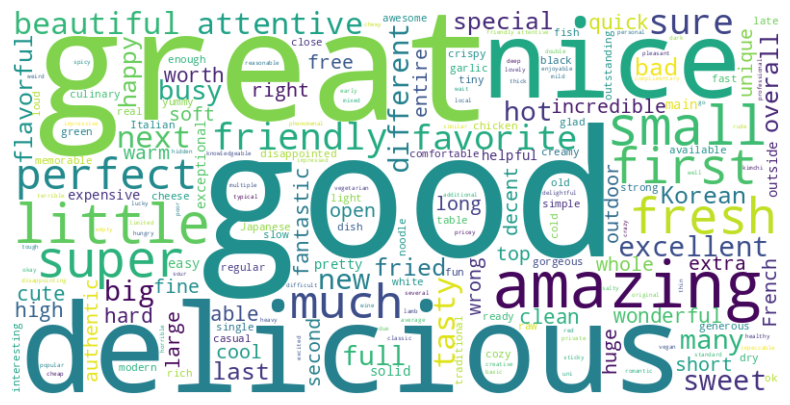

In [ ]:
# Download necessary data for stopwords
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

# Define stop words
stop_words = set(stopwords.words('english'))

# Combine all the review texts into one large string
text = " ".join(review for review in data['Comment'].astype(str))

# Tokenize the words
words = word_tokenize(text)

# Filter adjectives using POS tagging
adjectives = [word for word, pos in pos_tag(words) if pos == 'JJ' and word.lower() not in stop_words]

# Generate the word cloud
adjective_text = " ".join(adjectives)
wordcloud = WordCloud(width=800, height=400, background_color="white", max_words=200).generate(adjective_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()